0 - Debugar problema de ínidice fora de limite ao trocar o número de gerações


1 - Testar a RCE com rastringin (10 variáveis float, limites -5,12 a +5,12, minimização), usando AG com crossover (dois pontos) 0,90; mutação (gaussiana) 0,05; 400 gerações; 100 indivíduos na população; seleção por torneio com 3 indivíduos; elitismo simples entre gerações; exercitando parâmetros do JSON. Para fazer isso, seguir os passsos:

a - Para cada grupo de parãmetros executar n (20) vezes o algoritmo e registrar melhor, média e desvio padrão do fitness da solução final de todas as execuções. Para a solução melhor, apresentar também a geração em que a solução é obtida e as variáveis de decisão com três casas decimais (que é a solução do problema, propriamente dito).

b - Limpar a saída para apresentar apenas : best fitness, best variables, best generation e gráfico do processo evolutivo.


frc2 - Para o relatório: Gerar tabela com estes resultados para cada grupo de parâmetros. Parâmetros a variar (se precisar aumentar ou diminuir os valores pode fazer - testar sensibilidade):
a - crossover - 0,20 ; 0,40; 0,60; 0,90
b - RCE - percentual (30% - 3000% - 10000%)
c - RCE - num var diff (1 - 3 - 6 - 9)
d - RCE - valor limite (0,1 - 0,5 - 2 - 5)
e - RCE - geraçoes para executar (5%, 10%, 20%, 50%)


3 - Para a próxima reunião, faremos uma análise de todos os resultados nas tabelas para testar com um setup dos melhores parâmetros encontrados.

In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_excel("./src/assets/output/results/resultado_RCE_1.xlsx")
df


def stringArrayToList():

    valores = df["Variaveis Decisão"].values
    array = []
    array_near_zero = []

    # Iterate through each value (assuming each value is a string representation of a list)
    for value_str in valores:
        try:
            # Remove leading and trailing brackets (if present)
            value_str = value_str.strip("[]")

            # Convert string to a list of floats
            value_list = [float(item) for item in value_str.split(",")]

            # Add the converted list to the array
            array.extend(value_list)  # Use extend for appending multiple values
        except ValueError:
            # Handle conversion errors (optional)
            print(f"Warning: Failed to convert '{value_str}' to float list. Skipping.")

    # Print the resulting array of numerical values
    print(array)

    for value in array:
        if abs(value) <= 0.06:
            array_near_zero.append(value)

    return array_near_zero

In [58]:
def ler_e_concatenar_excel(caminho_arquivos):
    df_final = pd.DataFrame()

    for arquivo in caminho_arquivos:
        df_temp = pd.read_excel(arquivo)
        # Ajustar o index para evitar duplicatas
        df_temp.index += len(df_final)
        df_final = pd.concat([df_final, df_temp], ignore_index=True)

    return df_final


caminho_arquivos = "./src/assets/output/results/"
numero_arquivos = 20  # Ajuste o número de arquivos

# Criar lista de caminhos de arquivo
lista_arquivos = []
for i in range(1, numero_arquivos + 1):
    nome_arquivo = f"resultado_RCE_{i}.xlsx"
    caminho_arquivo = os.path.join(caminho_arquivos, nome_arquivo)
    lista_arquivos.append(caminho_arquivo)

# Ler e concatenar os arquivos
df_consolidado = ler_e_concatenar_excel(lista_arquivos)

# Exibir o DataFrame consolidado
display(df_consolidado)
df_consolidado.to_excel(
    "./src/assets/output/resultado consolidado/resultado_consolidado.xlsx",
    index=False,
)


,Resultado,Best Fitness Value,Media Fitness,Desvio Padrão,Variaveis Decisão,Solution Generation,Crossover,Percentual,Num Var Diferença,Delta,RCE Generations
0,1,0.019569,36.521412,13.575838,"[0.001, 0.01, 2.647, 2.329, -2.014, 1.156, 4.4...",207,0.9,100,9,5,0.5
1,2,0.001468,35.897559,14.174984,"[0.002, -0.001, -3.649, -4.374, 2.679, 1.623, ...",290,0.9,100,9,5,0.5
2,3,0.021421,33.425834,14.245375,"[-0.004, 0.01, 4.869, -0.857, -1.339, -2.63, 0...",50,0.9,100,9,5,0.5
3,4,0.012604,35.968724,12.949908,"[0.003, -0.007, 2.736, -2.709, -2.144, 3.158, ...",346,0.9,100,9,5,0.5
4,5,0.014619,38.250989,13.064510,"[0.009, -0.001, -2.525, 0.518, 3.849, -3.397, ...",104,0.9,100,9,5,0.5
5,6,0.004308,35.309291,14.804278,"[-0.001, 0.005, -1.314, -4.586, 0.412, -4.089,...",358,0.9,100,9,5,0.5
6,7,0.009362,36.531745,15.368873,"[-0.001, 0.007, 3.175, 1.231, 2.945, -0.581, 1...",202,0.9,100,9,5,0.5
7,8,0.002394,35.429358,14.586451,"[0.003, 0.002, -3.384, 3.603, -2.505, 0.826, 0...",214,0.9,100,9,5,0.5
8,9,0.031169,36.966370,14.447955,"[0.001, -0.012, 0.059, -0.666, 5.032, -2.621, ...",152,0.9,100,9,5,0.5
9,10,0.028135,35.471024,14.828643,"[0.004, 0.011, 3.918, 5.645, -2.628, -2.764, 5...",309,0.9,100,9,5,0.5


In [59]:
x = 300/100
x

3.0

In [60]:
import pandas as pd
import openpyxl
import seaborn as sns
from openpyxl.styles import PatternFill, Font


class AnaliseColuna:
    def __init__(self, df, coluna):
        self.df = df
        self.coluna = coluna

    def calcula_estatisticas(self):
        """Calcula a média, mínimo e máximo da coluna especificada."""
        calculo_media = self.df[self.coluna].mean()
        calculo_min = self.df[self.coluna].min()
        calculo_max = self.df[self.coluna].max()

        print(f"Média da coluna '{self.coluna}': {calculo_media}")
        print(f"Mínimo da coluna '{self.coluna}': {calculo_min}")
        print(f"Máximo da coluna '{self.coluna}': {calculo_max}")

        return calculo_min, calculo_media, calculo_max
 

    def formata_excel(self, arquivo_excel, dicionario):

        # criar o arquivo se nao existir
        self.df.to_excel(
            f"./src/assets/output/resultado consolidado/{arquivo_excel}",
            index=False,
        )

        """Formata o arquivo Excel com as estatísticas em vermelho."""
        pathGlobal = f"/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/output/resultado consolidado/{arquivo_excel}"
        wb = openpyxl.load_workbook(pathGlobal)
        ws = wb.active

        for item in dicionario:
            celula = ws.cell(row=item["key"], column=1)
            celula.value = item["valor"]
            celula.fill = PatternFill(
                start_color="FFFF0000", end_color="FFFF0000", fill_type="solid"
            )
            celula.font = Font(color="FFFFFFFF")

        wb.save(pathGlobal)


def main():

    analise = AnaliseColuna(df_consolidado, "Best Fitness Value")
    calculo_min, calculo_media, calculo_max = analise.calcula_estatisticas()
    media_median = df_consolidado["Media Fitness"].mean()
    print("Fitness mean = ",media_median)

    media_std = df_consolidado["Desvio Padrão"].mean()
    print("STD medio", media_std)

    dicionario = [
        {"key": 1, "valor": "Coluna1"},
        {"key": 2, "valor": calculo_min},
        {"key": 3, "valor": calculo_media},
        {"key": 4, "valor": calculo_max},
    ]

    analise.formata_excel("resultado_calculado.xlsx", dicionario)


if __name__ == "__main__":
    main()

Média da coluna 'Best Fitness Value': 0.020651616053656684
Mínimo da coluna 'Best Fitness Value': 0.001467866411049457
Máximo da coluna 'Best Fitness Value': 0.0775125972758719
Fitness mean =  36.07397133202042
STD medio 14.519345953268038


In [61]:
df_consolidado.describe()

,Resultado,Best Fitness Value,Media Fitness,Desvio Padrão,Solution Generation,Crossover,Percentual,Num Var Diferença,Delta,RCE Generations
count,20.00000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.0,20.0,20.0,20.0
mean,10.50000,0.020652,36.073971,14.519346,251.250000,9.000000e-01,100.0,9.0,5.0,0.5
std,5.91608,0.021543,1.133907,0.968326,101.448911,2.278130e-16,0.0,0.0,0.0,0.0
min,1.00000,0.001468,33.425834,12.882872,50.000000,9.000000e-01,100.0,9.0,5.0,0.5
25%,5.75000,0.004869,35.460607,13.802213,198.000000,9.000000e-01,100.0,9.0,5.0,0.5
50%,10.50000,0.016043,36.201075,14.674881,281.000000,9.000000e-01,100.0,9.0,5.0,0.5
75%,15.25000,0.025182,36.715434,15.138148,340.000000,9.000000e-01,100.0,9.0,5.0,0.5
max,20.00000,0.077513,38.250989,16.232333,389.000000,9.000000e-01,100.0,9.0,5.0,0.5


In [62]:
from functools import reduce


def encontrar_repetidos_ou_espelhados(array):
    """
    Função que utiliza reduce para encontrar resultados repetidos ou espelhados
    em um array.

    Args:
      array: O array de entrada.
      num_var: O valor a ser buscado no array.

    Returns:
      Uma lista com os resultados repetidos ou espelhados.
    """

    def combinar(resultados, valor):
        num_var = array[0]  # Defina o valor a ser buscado

        """Função auxiliar para usar com reduce."""
        if valor == num_var or valor == -num_var:
            resultados.append(valor)
        return resultados

    return reduce(combinar, array, [])


# Exemplo de uso:
array = [0.005, -0.017, -0.005, -0.002, 0.993, 0.005, 0.044, -0.007, 0.005, 0.04]
resultados = encontrar_repetidos_ou_espelhados(array)

print(f"Resultados repetidos ou espelhados para {len(resultados)}: {resultados}")

Resultados repetidos ou espelhados para 4: [0.005, -0.005, 0.005, 0.005]


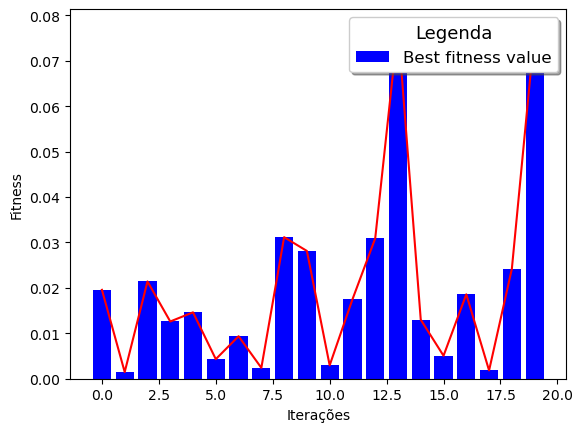

In [63]:


class Analise:
    def __init__(self) -> None:
        pass

    def calcula(self,df):
        #media coluna Best Fitness Value,Media Fitness, Media Desvio Padrão
                
        print("Media = ")


df_consolidado = pd.read_excel("./src/assets/output/resultado consolidado/resultado_consolidado.xlsx")

plt.plot(df_consolidado["Best Fitness Value"], color="red")

plt.xlabel("Iterações")
plt.ylabel("Fitness")


plt.bar(
    df_consolidado["Resultado"] - 1,
    df_consolidado["Best Fitness Value"],
    color="blue",
    label="Best fitness value",
)
plt.legend(
    title="Legenda",
    title_fontsize="13",
    loc="upper right",
    fontsize="12",
    shadow=True,
    facecolor="white",
)

plt.show()

[0.001, 0.01, 2.647, 2.329, -2.014, 1.156, 4.467, 2.249, 0.019, 0.904]


/tmp/ipykernel_1232001/1627336378.py:7: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(


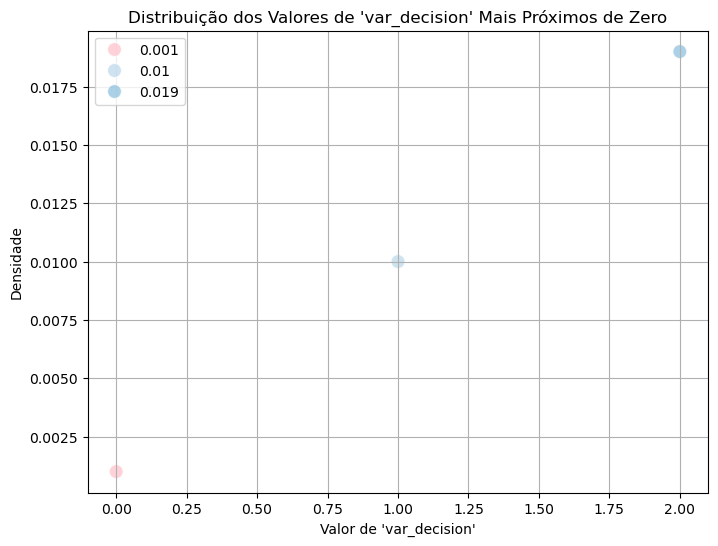

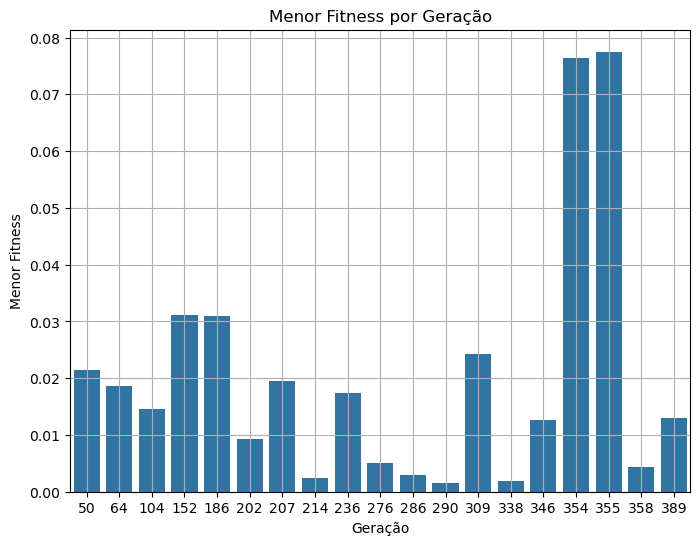

In [64]:
var_decision_near_zero = stringArrayToList()

plt.figure(figsize=(8, 6))
cmap = sns.color_palette("Blues",)  # Create a red color palette with 2 colors
cmap[0] = "pink"  # Assign red to the first color (value 0)
# Generate the scatterplot with hue and custom color map
sns.scatterplot(
    x=range(len(var_decision_near_zero)),
    y=var_decision_near_zero,
    hue=var_decision_near_zero,
    palette=cmap,
    s=100,  # Adjust marker size as needed
    alpha=0.7,  # Adjust marker transparency as needed
)
plt.title("Distribuição dos Valores de 'var_decision' Mais Próximos de Zero")
plt.xlabel("Valor de 'var_decision'")
plt.ylabel("Densidade")
plt.grid(True)
plt.show()

# 3. Bar plot of lowest fitness values by generation
lowest_fitness_by_gen = df_consolidado.groupby("Solution Generation")[
    "Best Fitness Value"
].min()
plt.figure(figsize=(8, 6))
sns.barplot(x=lowest_fitness_by_gen.index, y=lowest_fitness_by_gen.values)
plt.title("Menor Fitness por Geração")
plt.xlabel("Geração")
plt.ylabel("Menor Fitness")
plt.grid(True)
plt.show()

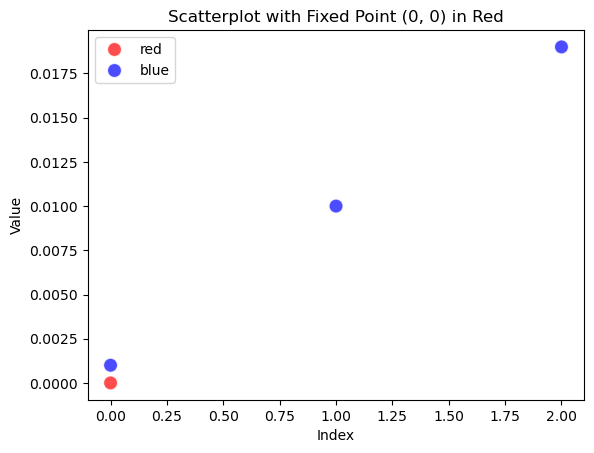

In [65]:
import pandas as pd
import seaborn as sns  # Import Seaborn for scatterplot
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the filtered values are stored in 'var_decision_near_zero'

# Prepare data for scatterplot
x_data = list(range(len(var_decision_near_zero)))
y_data = var_decision_near_zero

# Create a separate data point for (0, 0) in red
red_point_x = [0]  # X-coordinate for (0, 0)
red_point_y = [0]  # Y-coordinate for (0, 0)
red_point_color = ["red"]  # Color for (0, 0)

# Combine data for the plot
x_data_combined = red_point_x + x_data  # Combine X-coordinates
y_data_combined = red_point_y + y_data  # Combine Y-coordinates
color_data_combined = red_point_color + ["blue"] * len(
    var_decision_near_zero
)  # Combine colors

# Generate the scatterplot with hue and custom color map
sns.scatterplot(
    x=x_data_combined,
    y=y_data_combined,
    hue=color_data_combined,
    palette=["red", "blue"],  # Use a simple 'red' and 'blue' palette
    s=100,  # Adjust marker size as needed
    alpha=0.7,  # Adjust marker transparency as needed
)

# Set axis labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Scatterplot with Fixed Point (0, 0) in Red")

# Show the plot
plt.show()